In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
sns.set_theme(style="whitegrid", context="notebook")

iris = load_iris(as_frame=True)
df = iris.frame

df = df.rename(columns={
                        "sepal length (cm)": "sepal_length",
                        "sepal width (cm)": "sepal_width",
                        "petal length (cm)": "petal_length",
                        "petal width (cm)": "petal_width",
                        "target": "species_id"
                        })

id_map = {i:name for i,name in enumerate(iris.target_names)}
df["species"] = df["species_id"].map(id_map)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 1) 데이터 구조&클래스 분포

In [2]:
print(df.shape)
print(df["species"].value_counts())

(150, 6)
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

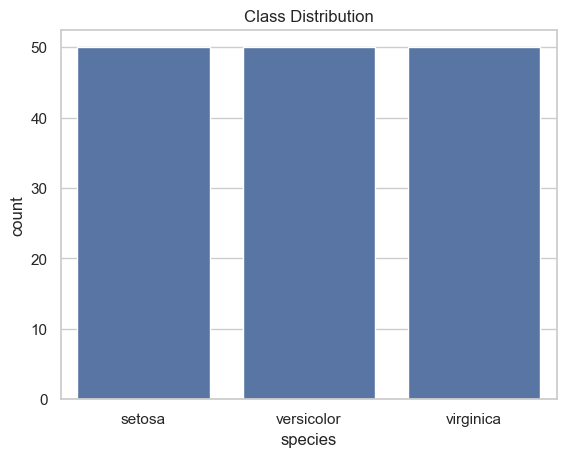

In [3]:
sns.countplot(data=df, x="species")
plt.title("Class Distribution")

# 2) 기초 통계 + 결측치

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_id      0
species         0
dtype: int64

# 3) 상관관계 HeatMap

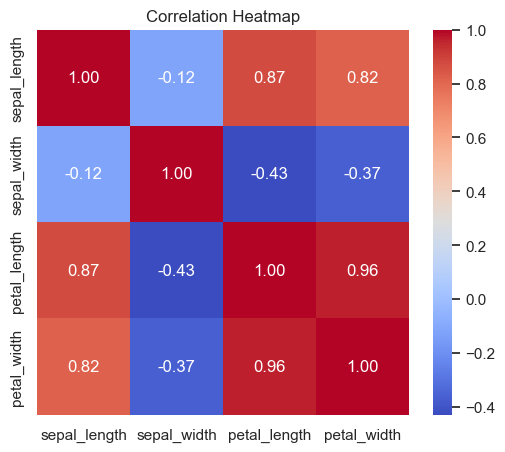

In [6]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop(columns=["species", "species_id"]).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap");

## 4) 분포 확인

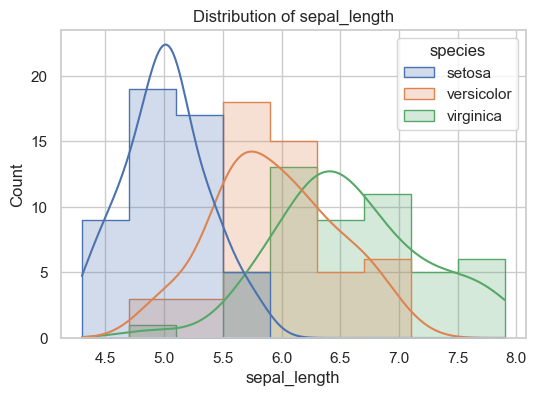

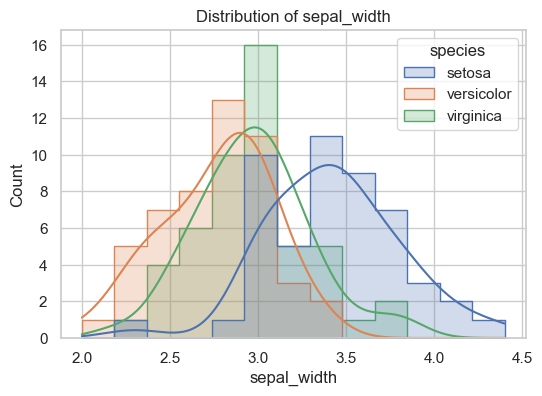

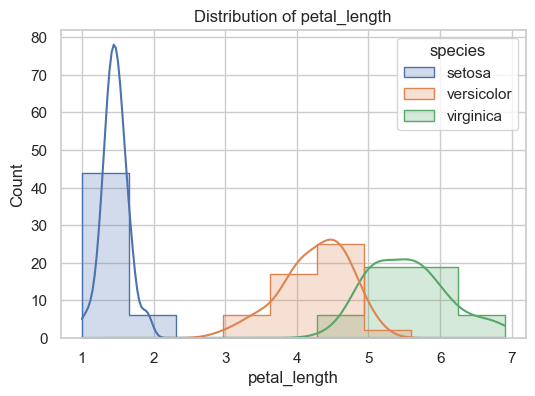

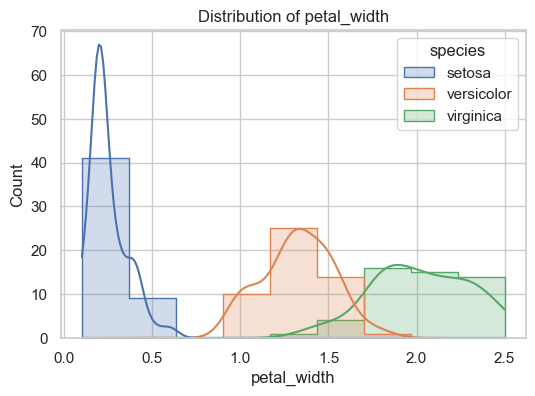

In [7]:
features = ["sepal_length","sepal_width","petal_length","petal_width"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="species", kde=True, element="step")
    plt.title(f"Distribution of {col}")

## 5) Pairplot

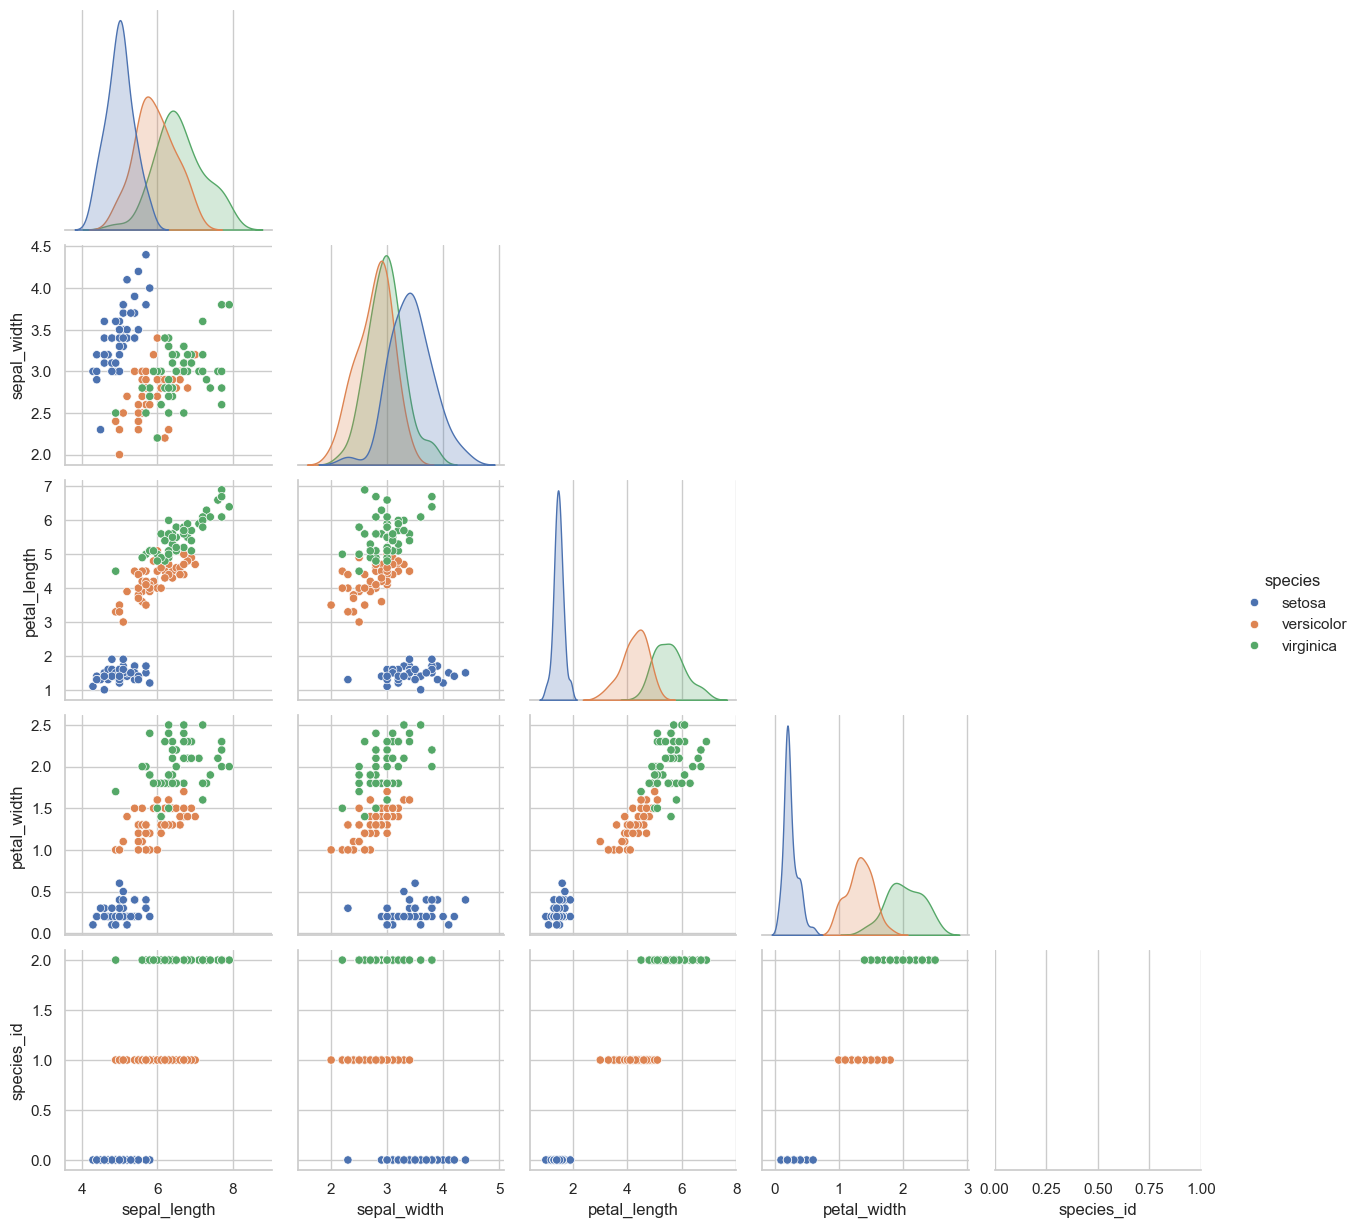

In [8]:
sns.pairplot(df, hue="species", corner=True, diag_kind="kde");

## 6) 분포확인

**BOX PLOT**

Text(0.5, 1.0, 'Petal Length by Species (Boxplot)')

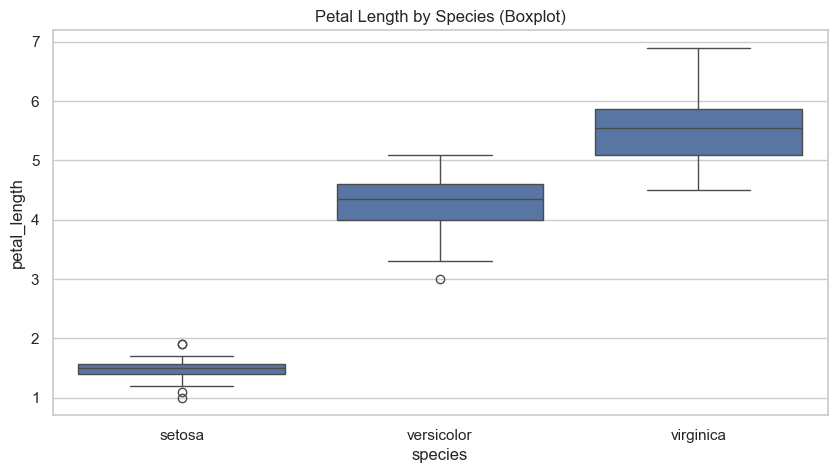

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Petal Length by Species (Boxplot)")

**VIOLIN PLOT**

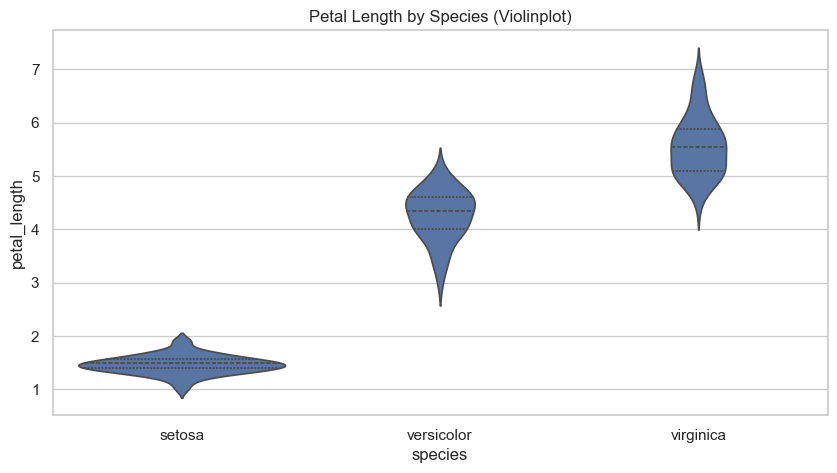

In [10]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="species", y="petal_length", inner="quartile")
plt.title("Petal Length by Species (Violinplot)");

## 7) Joint Plot

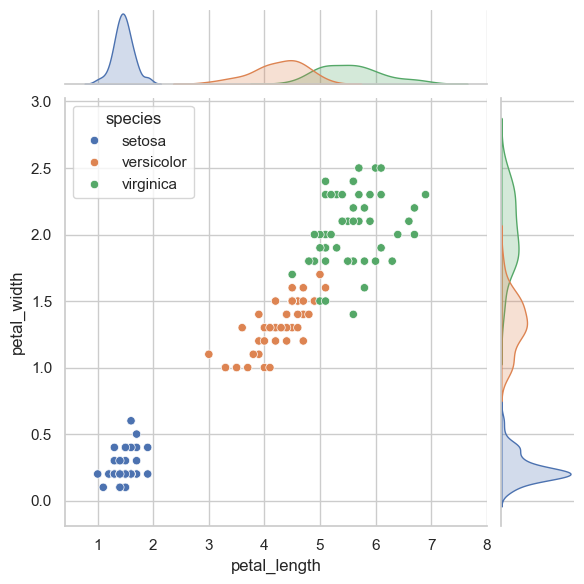

In [11]:
sns.jointplot(data=df, x="petal_length", y="petal_width", hue="species", height=6);